In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors

In [24]:
# parameters to be tuned

# number of neighbors
k_value = 100

# 'uniform' 'distance'
weights_mode = 'uniform'

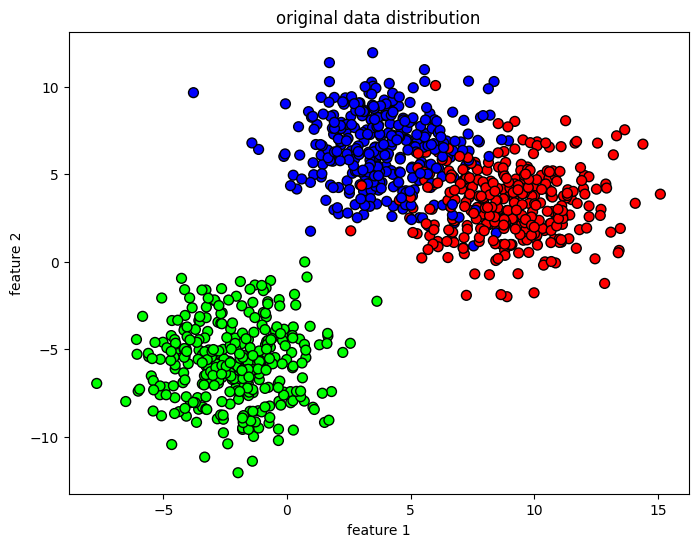

In [20]:
n_samples = 1000

X, y = datasets.make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=998, cluster_std=2.0)

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.title("original data distribution")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

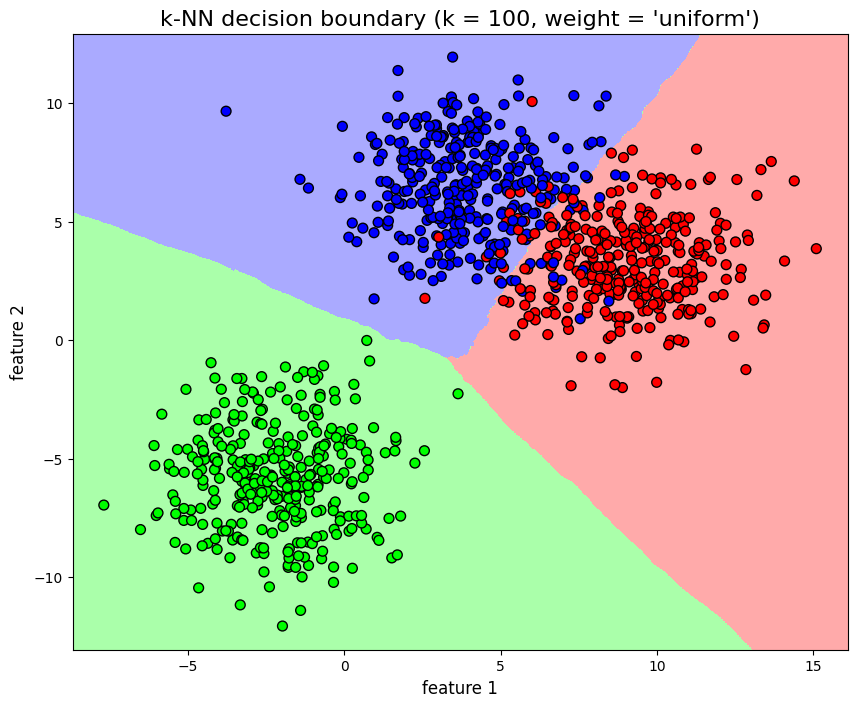

In [25]:
clf = neighbors.KNeighborsClassifier(n_neighbors=k_value, weights=weights_mode)

clf.fit(X, y)

h = .02  # step size of the grids
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"k-NN decision boundary (k = {k_value}, weight = '{weights_mode}')", fontsize=16)
plt.xlabel("feature 1", fontsize=12)
plt.ylabel("feature 2", fontsize=12)
plt.show()